# Separating Spam from Ham

<img src="images/spam.png"/>

Nearly every email user has at some point encountered a "spam" email, which is an unsolicited message often advertising a product, containing links to malware, or attempting to scam the recipient. Roughly 80-90% of more than 100 billion emails sent each day are spam emails, most being sent from botnets of malware-infected computers. The remainder of emails are called "ham" emails.

As a result of the huge number of spam emails being sent across the Internet each day, most email providers offer a spam filter that automatically flags likely spam messages and separates them from the ham. Though these filters use a number of techniques (e.g. looking up the sender in a so-called "Blackhole List" that contains IP addresses of likely spammers), most rely heavily on the analysis of the contents of an email via text analytics.

In this homework problem, we will build and evaluate a spam filter using a publicly available dataset first described in the 2006 conference paper "Spam Filtering with Naive Bayes -- Which Naive Bayes?" by V. Metsis, I. Androutsopoulos, and G. Paliouras. The "ham" messages in this dataset come from the inbox of former Enron Managing Director for Research Vincent Kaminski, one of the inboxes in the Enron Corpus. One source of spam messages in this dataset is the SpamAssassin corpus, which contains hand-labeled spam messages contributed by Internet users. The remaining spam was collected by Project Honey Pot, a project that collects spam messages and identifies spammers by publishing email address that humans would know not to contact but that bots might target with spam. The full dataset we will use was constructed as roughly a 75/25 mix of the ham and spam messages.

The dataset contains just two fields:

    text: The text of the email.
    spam: A binary variable indicating if the email was spam.

## Problem 1.1 - Loading the Dataset
Begin by loading the dataset emails.csv into a data frame called emails. Remember to pass the stringsAsFactors=FALSE option when loading the data.

**How many emails are in the dataset?**

In [1]:
# Load the dataset
emails = read.csv("data/emails.csv", stringsAsFactors=FALSE)

head(emails,3)

,text,spam
,<chr>,<int>
1,"Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo , stylish statlonery and outstanding website will make the task much easier . we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader : it isguite ciear that without good products , effective business organization and practicable aim it will be hotat nowadays market ; but we do promise that your marketing efforts will become much more effective . here is the list of clear benefits : creativeness : hand - made , original logos , specially done to reflect your distinctive company image . convenience : logo and stationery are provided in all formats ; easy - to - use content management system letsyou change your website content and even its structure . promptness : you will see logo drafts within three business days . affordability : your marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction guaranteed : we provide unlimited amount of changes with no extra fees for you to be surethat you will love the result of this collaboration . have a look at our portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _",1
2,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no,1
3,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended to you unconditionally and your credit is in no way a factor . to take advantage of this limited time opportunity all we ask is that you visit our website and complete the 1 minute post approval form look foward to hearing from you , dorcas pittman",1


In [2]:
# Examine the string emails
str(emails)

'data.frame':	5728 obs. of  2 variables:
 $ text: chr  "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market"| __truncated__ "Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmar"| __truncated__ "Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved"| __truncated__ "Subject: 4 color printing special  request additional information now ! click here  click here for a printable "| __truncated__ ...
 $ spam: int  1 1 1 1 1 1 1 1 1 1 ...


Answer: 5728 emails in the dataset.

### Problem 1.2 - Loading the Dataset
**How many of the emails are spam?**

In [3]:
sm = table(emails$spam)
sm


   0    1 
4360 1368 

Answer: 1368 emails are spam.

### Problem 1.3 - Loading the Dataset
**Which word appears at the beginning of every email in the dataset?**

In [4]:
# Examine the string emails that are text
str(emails$text[1])

 chr "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market"| __truncated__


Answer: "Subject" appears at the beginning of every email in the dataset.

### Problem 1.4 - Loading the Dataset
**Could a spam classifier potentially benefit from including the frequency of the word that appears in every email?**

Answer: The frequency with which it appears might help us differentiate spam from ham, because the existence of some words increases the possibility that that email is a spam, especially if it is combined with other words in the same set of words.

### Problem 1.5 - Loading the Dataset
The nchar() function counts the number of characters in a piece of text. **How many characters are in the longest email in the dataset** (where longest is measured in terms of the maximum number of characters)?

In [5]:
max(nchar(emails$text))

[1] 43952

### Problem 1.6 - Loading the Dataset
**Which row contains the shortest email in the dataset?** (Just like in the previous problem, shortest is measured in terms of the fewest number of characters.)

In [6]:
which.min(nchar(emails$text))

[1] 1992

### Problem 2.1 - Preparing the Corpus
Follow the standard steps to build and pre-process the corpus:

    1) Build a new corpus variable called corpus.

    2) Using tm_map, convert the text to lowercase.

    3) Using tm_map, remove all punctuation from the corpus.

    4) Using tm_map, remove all English stopwords from the corpus.

    5) Using tm_map, stem the words in the corpus.

    6) Build a document term matrix from the corpus, called dtm.

If the code length(stopwords("english")) does not return 174 for you, then please run the line of code in this file, which will store the standard stop words in a variable called sw. When removing stop words, use tm_map(corpus, removeWords, sw) instead of tm_map(corpus, removeWords, stopwords("english")).

**How many terms are in dtm?**

In [7]:
library(tm)

Loading required package: NLP



In [8]:
# Build a new corpus variable called corpus
corpus = VCorpus(VectorSource(emails$text))

# Convert the text to lowercase.
corpus = tm_map(corpus, content_transformer(tolower))

# Remove all punctuation from the corpus
corpus = tm_map(corpus, removePunctuation)

# Remove all English stopwords from the corpus
corpus = tm_map(corpus, removeWords, stopwords("english"))

# Stem the words in the corpus
corpus = tm_map(corpus, stemDocument)

# Build a document term matrix from the corpus, called dtm
dtm = DocumentTermMatrix(corpus)
dtm

<<DocumentTermMatrix (documents: 5728, terms: 28687)>>
Non-/sparse entries: 481719/163837417
Sparsity           : 100%
Maximal term length: 24
Weighting          : term frequency (tf)

Answer: There are 28687 terms in dtm.

### Problem 2.2 - Preparing the Corpus
To obtain a more reasonable number of terms, limit dtm to contain terms appearing in at least 5% of documents, and store this result as spdtm (don't overwrite dtm, because we will use it in a later step of this homework). **How many terms are in spdtm?**

In [9]:
# Remove the sparse terms
spdtm = removeSparseTerms(dtm, 0.95)
spdtm

<<DocumentTermMatrix (documents: 5728, terms: 330)>>
Non-/sparse entries: 213551/1676689
Sparsity           : 89%
Maximal term length: 10
Weighting          : term frequency (tf)

Answer: There are 330 terms in spdtm.

### Problem 2.3 - Preparing the Corpus
Build a data frame called emailsSparse from spdtm, and use the make.names function to make the variable names of emailsSparse valid.

colSums() is an R function that returns the sum of values for each variable in our data frame. Our data frame contains the number of times each word stem (columns) appeared in each email (rows). Therefore, colSums(emailsSparse) returns the number of times a word stem appeared across all the emails in the dataset. **What is the word stem that shows up most frequently across all the emails in the dataset?** Hint: think about how you can use sort() or which.max() to pick out the maximum frequency.

In [10]:
# Build data frame called emailsSparse from spdtm

emailsSparse = as.data.frame(as.matrix(spdtm))

colnames(emailsSparse) = make.names(colnames(emailsSparse))

# Word stem that is frequent

frequency <- colSums(emailsSparse)

which.max(frequency)

enron 
   92

Answer: "Enron" is the most frequent word.

### Problem 2.4 - Preparing the Corpus
Add a variable called "spam" to emailsSparse containing the email spam labels. You can do this by copying over the "spam" variable from the original data frame (remember how we did this in the Twitter lecture).

**How many word stems appear at least 5000 times in the ham emails in the dataset?** Hint: in this and the next question, remember not to count the dependent variable we just added.

In [11]:
# Add a variable called spam

emailsSparse$spam = emails$spam

# Sort the ham emails in dataset

a = sort((colSums(subset(emailsSparse, spam == 0))))

tail(a,12)

can    thank      com    pleas kaminski    X2000      hou     will 
    3426     3558     4444     4494     4801     4935     5569     6802 
    vinc  subject      ect    enron 
    8531     8625    11417    13388

In [12]:
a[a>=5000]

hou    will    vinc subject     ect   enron 
   5569    6802    8531    8625   11417   13388

6 words stems appear at least 5000 times in the ham emails in the dataset.

### Problem 2.5 - Preparing the Corpus
**How many word stems appear at least 1000 times in the spam emails in the dataset?**

In [13]:
# Sort the spam emails in the dataset
b = sort((colSums(subset(emailsSparse, spam == 1))))

tail(b,12)

get  receiv  inform     can   email    busi    mail     com compani    spam 
    694     727     818     831     865     897     917     999    1065    1368 
   will subject 
   1450    1577

In [14]:
b[b>=1000]

compani    spam    will subject 
   1065    1368    1450    1577

3 words stems appear at least 1000 times in the spam emails in the dataset.

### Problem 2.6 - Preparing the Corpus
**The lists of most common words are significantly different between the spam and ham emails. What does this likely imply?**

Answer: That we can use frequency of words as a method to separate spam and ham emails.

### Problem 2.7 - Preparing the Corpus
Several of the most common word stems from the ham documents, such as "enron", "hou" (short for Houston), "vinc" (the word stem of "Vince") and "kaminski", are likely specific to Vincent Kaminski's inbox. **What does this mean about the applicability of the text analytics models we will train for the spam filtering problem?**

Answer: We can use this to create a filter.

### Problem 3.1 - Building machine learning models
First, convert the dependent variable to a factor with "emailsSparse$spam = as.factor(emailsSparse$spam)".

Next, set the random seed to 123 and use the sample.split function to split emailsSparse 70/30 into a training set called "train" and a testing set called "test". Make sure to perform this step on emailsSparse instead of emails.

Using the training set, train the following three machine learning models. The models should predict the dependent variable "spam", using all other available variables as independent variables. Please be patient, as these models may take a few minutes to train.

1) A logistic regression model called spamLog. You may see a warning message here - we'll discuss this more later.

2) A CART model called spamCART, using the default parameters to train the model (don't worry about adding minbucket or cp). Remember to add the argument method="class" since this is a binary classification problem.

3) A random forest model called spamRF, using the default parameters to train the model (don't worry about specifying ntree or nodesize). Directly before training the random forest model, set the random seed to 123 (even though we've already done this earlier in the problem, it's important to set the seed right before training the model so we all obtain the same results. Keep in mind though that on certain operating systems, your results might still be slightly different).

For each model, obtain the predicted spam probabilities for the training set. Be careful to obtain probabilities instead of predicted classes, because we will be using these values to compute training set AUC values. Recall that you can obtain probabilities for CART models by not passing any type parameter to the predict() function, and you can obtain probabilities from a random forest by adding the argument type="prob". For CART and random forest, you need to select the second column of the output of the predict() function, corresponding to the probability of a message being spam.

You may have noticed that training the logistic regression model yielded the messages "algorithm did not converge" and "fitted probabilities numerically 0 or 1 occurred". Both of these messages often indicate overfitting and the first indicates particularly severe overfitting, often to the point that the training set observations are fit perfectly by the model. Let's investigate the predicted probabilities from the logistic regression model.

**How many of the training set predicted probabilities from spamLog are less than 0.00001?**

In [15]:
# Convert the dependent variable
emailsSparse$spam = as.factor(emailsSparse$spam)

In [16]:
library(caTools)

In [17]:
# Split the dataset into training and testing sets
set.seed(123)

spl = sample.split(emailsSparse$spam, 0.7)

train = subset(emailsSparse, spl == TRUE)
test = subset(emailsSparse, spl == FALSE)

In [18]:
# Create the logistic Regression Model
spamLog = glm(spam~., data=train, family="binomial")

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [19]:
# Create the predictions for Logistic Model
predTrainLog = predict(spamLog, type="response")

to = table(predTrainLog < 0.00001)

to


FALSE  TRUE 
  964  3046 

Answer: 3046 training set predicted probabilities from spamLog are less than 0.00001.

**How many of the training set predicted probabilities from spamLog are more than 0.99999?**

In [20]:
tp = table(predTrainLog > 0.99999)

tp


FALSE  TRUE 
 3056   954 

Answer: 954 training set predicted probabilities from spamLog are more than 0.99999.

**How many of the training set predicted probabilities from spamLog are between 0.00001 and 0.99999?**

In [21]:
tq = table(predTrainLog >= 0.00001 & predTrainLog <= 0.99999)

tq


FALSE  TRUE 
 4000    10 

Answer: 10 training set predicted probabilities from spamLog are between 0.00001 and 0.99999.

### Problem 3.2 - Building Machine Learning Models
**How many variables are labeled as significant (at the p=0.05 level) in the logistic regression summary output?**

In [22]:
# Output the summary
summary(spamLog)


Call:
glm(formula = spam ~ ., family = "binomial", data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.011   0.000   0.000   0.000   1.354  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -3.082e+01  1.055e+04  -0.003    0.998
X000         1.474e+01  1.058e+04   0.001    0.999
X2000       -3.631e+01  1.556e+04  -0.002    0.998
X2001       -3.215e+01  1.318e+04  -0.002    0.998
X713        -2.427e+01  2.914e+04  -0.001    0.999
X853        -1.212e+00  5.942e+04   0.000    1.000
abl         -2.049e+00  2.088e+04   0.000    1.000
access      -1.480e+01  1.335e+04  -0.001    0.999
account      2.488e+01  8.165e+03   0.003    0.998
addit        1.463e+00  2.703e+04   0.000    1.000
address     -4.613e+00  1.113e+04   0.000    1.000
allow        1.899e+01  6.436e+03   0.003    0.998
alreadi     -2.407e+01  3.319e+04  -0.001    0.999
also         2.990e+01  1.378e+04   0.002    0.998
analysi     -2.405e+01  3.860e+04  -0.001    1.000

Answer: 0 variables are labeled as significant.

### Problem 3.3 - Building Machine Learning Models
**How many of the word stems "enron", "hou", "vinc", and "kaminski" appear in the CART tree?** Recall that we suspect these word stems are specific to Vincent Kaminski and might affect the generalizability of a spam filter built with his ham data.

In [23]:
library(rpart)
library(rpart.plot)

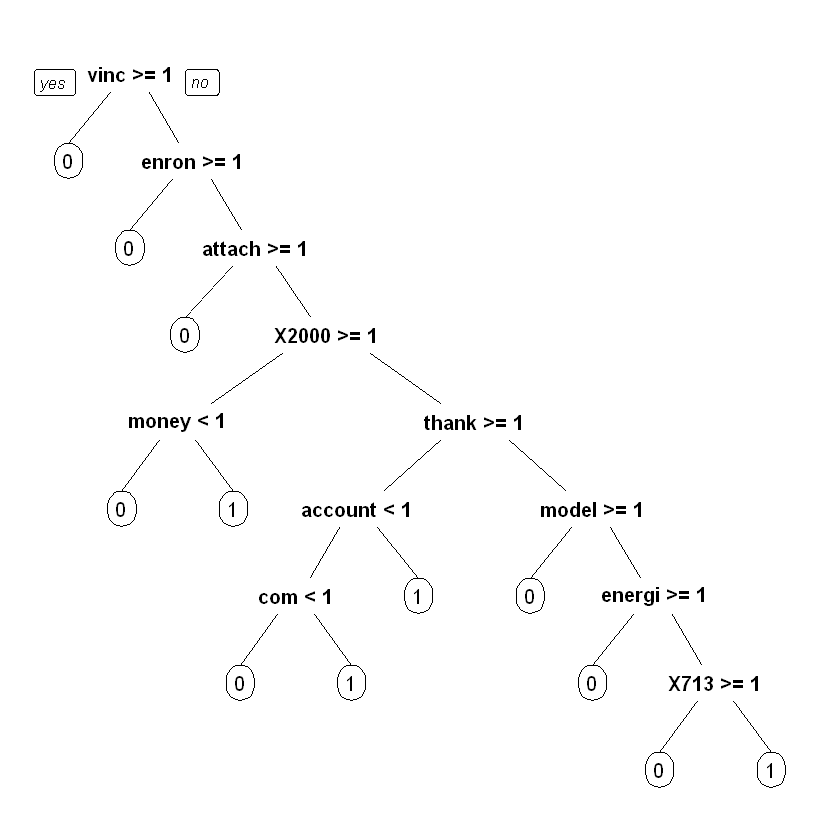

In [24]:
# Classification and Regression Trees (CART)
spamCART = rpart(spam ~ ., data=train, method='class')

# Plot the Tree
prp(spamCART)

### Problem 3.4 - Building Machine Learning Models
**What is the training set accuracy of spamLog, using a threshold of 0.5 for predictions?**

In [25]:
# Tabulate the spam in the training set and predictTrainLog (Logistic Regression)
cmLR = table(train$spam, predTrainLog > 0.5)
cmLR

   
    FALSE TRUE
  0  3052    0
  1     4  954

The rows are labeled with the actual outcome, and the columns are labeled with the predicted outcome.

                      Predict 0       Predict 1
        Actual 0    True Negative   False Positive
        Actual 1    False Negative  True Positive

        cmLR = [1][3]
               [2][4]

In [26]:
# Logistic Regression Accuracy
accurLR = sum(diag(cmLR))/sum(cmLR)
paste("Accuracy Logistic Regression:", round(accurLR,digits=6))

[1] "Accuracy Logistic Regression: 0.999002"

### Problem 3.5 - Building Machine Learning Models
**What is the training set AUC of spamLog?**

In [27]:
library(ROCR)

In [28]:
# Calculate the training set AUC
ROCRpred = prediction(predTrainLog, train$spam)

# Area Under the ROC Curve (AUC)
AUCLR = as.numeric(performance(ROCRpred, "auc")@y.values)
paste("AUC Logistic Regression:", round(AUCLR,digits=6))

[1] "AUC Logistic Regression: 0.999996"

### Problem 3.6 - Building Machine Learning Models
**What is the training set accuracy of spamCART, using a threshold of 0.5 for predictions?** (Remember that if you used the type="class" argument when making predictions, you automatically used a threshold of 0.5. If you did not add in the type argument to the predict function, the probabilities are in the second column of the predict output.)

In [29]:
# Make predictions on the training set accuracy CART
predTrainCART = predict(spamCART)[,2]

# Tabulate the spam in the training set and predictions
cmCA = table(train$spam, predTrainCART > 0.5)
cmCA

   
    FALSE TRUE
  0  2885  167
  1    64  894

In [30]:
# CART Accuracy
accurCA = sum(diag(cmCA))/sum(cmCA)
paste("Accuracy CART:", round(accurCA,digits=6))

[1] "Accuracy CART: 0.942394"

### Problem 3.7 - Building Machine Learning Models
**What is the training set AUC of spamCART?** (Remember that you have to pass the prediction function predicted probabilities, so don't include the type argument when making predictions for your CART model.)

In [31]:
# Calculate the training set AUC
ROCRpredCA = prediction(predTrainCART, train$spam)

# Area Under the ROC Curve (AUC)
AUCCA = as.numeric(performance(ROCRpredCA, "auc")@y.values)

paste("AUC CART:", round(AUCCA,digits=6))

[1] "AUC CART: 0.969604"

### Problem 3.8 - Building Machine Learning Models
**What is the training set accuracy of spamRF, using a threshold of 0.5 for predictions?** (Remember that your answer might not match ours exactly, due to random behavior in the random forest algorithm on different operating systems.)

In [32]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [33]:
# Implement the Random Forest (RF) algorithm
set.seed(123)

spamRF = randomForest(spam~., data=train)

In [34]:
# Make predictions using the RF model
predTrainRF = predict(spamRF, type="prob")[,2]

# Tabulate the spam in the training and predictions
cmRF = table(train$spam, predTrainRF > 0.5)
cmRF

   
    FALSE TRUE
  0  3015   37
  1    42  916

In [35]:
# Random Forest  Accuracy
accurRF = sum(diag(cmRF))/sum(cmRF)
paste("Accuracy Random Forest:", round(accurRF,digits=6))

[1] "Accuracy Random Forest: 0.980299"

### Problem 3.9 - Building Machine Learning Models
**What is the training set AUC of spamRF?** (Remember to pass the argument type="prob" to the predict function to get predicted probabilities for a random forest model. The probabilities will be the second column of the output.)

In [36]:
# Calculate the training set AUC
ROCRpredRF = prediction(predTrainRF, train$spam)

# Area Under the ROC Curve (AUC)
AUCRF = as.numeric(performance(ROCRpredRF, "auc")@y.values)

paste("AUC Random Forest:", round(AUCRF,digits=6))

[1] "AUC Random Forest: 0.997816"

### Problem 3.10 - Building Machine Learning Models
**Which model had the best training set performance, in terms of accuracy and AUC?**

In [37]:
paste("Accuracy Logistic Regression:", round(accurLR,digits=6))
paste("Accuracy CART:", round(accurCA,digits=6))
paste("Accuracy Random Forest:", round(accurRF,digits=6))

paste("AUC Logistic Regression:", round(AUCLR,digits=6))
paste("AUC CART:", round(AUCCA,digits=6))
paste("AUC Random Forest:", round(AUCRF,digits=6))

[1] "Accuracy Logistic Regression: 0.999002"

[1] "Accuracy CART: 0.942394"

[1] "Accuracy Random Forest: 0.980299"

[1] "AUC Logistic Regression: 0.999996"

[1] "AUC CART: 0.969604"

[1] "AUC Random Forest: 0.997816"

Answer:

    Best Accuracy: Logistic Regression.
    Best Area Under the ROC curve: Logistic Regression.

### Problem 4.1 - Evaluating on the Test Set
Obtain predicted probabilities for the testing set for each of the models, again ensuring that probabilities instead of classes are obtained.

**What is the testing set accuracy of spamLog, using a threshold of 0.5 for predictions?**

In [38]:
# Make predictions using Logistic Regression
predTestLog = predict(spamLog, newdata = test, type="response")

# Tabulate the spam in the testing set and predictions
cmLGT = table(test$spam, predTestLog > 0.5)
cmLGT

   
    FALSE TRUE
  0  1257   51
  1    34  376

In [39]:
# Compute Testing set Logistic Regression Accuracy
accurLGT = sum(diag(cmLGT))/sum(cmLGT)
paste("Accuracy Testing Set Logistic Regression:", round(accurLGT,digits=6))

[1] "Accuracy Testing Set Logistic Regression: 0.950524"

### Problem 4.2 - Evaluating on the Test Set
**What is the testing set AUC of spamLog?**

In [40]:
# Calculate the testing set AUC 
ROCRpredLRT = prediction(predTestLog, test$spam)

# Area Under the ROC Curve (AUC)
AUCLRT = as.numeric(performance(ROCRpredLRT, "auc")@y.values)

paste("AUC testing set Logistic Regression:", round(AUCRF,digits=6))

[1] "AUC testing set Logistic Regression: 0.997816"

### Problem 4.3 - Evaluating on the Test Set
**What is the testing set accuracy of spamCART, using a threshold of 0.5 for predictions?**

In [41]:
# Making predictions using the CART model
predTestCART = predict(spamCART, newdata = test)[,2]

# Tabulate the spam in the testing set and predictTestCART
cmCAT = table(test$spam, predTestCART > 0.5)
cmCAT

   
    FALSE TRUE
  0  1228   80
  1    24  386

In [42]:
# Compute Testing set Classification and Regression Trees Accuracy
accurCAT = sum(diag(cmCAT))/sum(cmCAT)
paste("Accuracy Testing Set CART:", round(accurCAT,digits=6))

[1] "Accuracy Testing Set CART: 0.939464"

### Problem 4.4 - Evaluating on the Test Set
**What is the testing set AUC of spamCART?**

In [43]:
# Calculate the testing set AUC 
ROCRpredCAT = prediction(predTestCART, test$spam)

# Area Under the ROC Curve (AUC)
AUCCAT = as.numeric(performance(ROCRpredCAT, "auc")@y.values)

paste("AUC testing set CART:", round(AUCCAT,digits=6))

[1] "AUC testing set CART: 0.963176"

## Problem 4.5 - Evaluating on the Test Set
**What is the testing set accuracy of spamRF, using a threshold of 0.5 for predictions?**

In [44]:
# Make predictions using random forest
predTestRF = predict(spamRF, newdata = test, type="prob")[,2]

# Tabulate the spam in the testing set and predictTestRF
cmRFT = table(test$spam, predTestRF > 0.5)
cmRFT

   
    FALSE TRUE
  0  1291   17
  1    23  387

In [45]:
# Compute Testing set Random Forest Accuracy
accurRFT = sum(diag(cmRFT))/sum(cmRFT)
paste("Accuracy Testing Set Random Forest:", round(accurRFT,digits=6))

[1] "Accuracy Testing Set Random Forest: 0.976717"

### Problem 4.6 - Evaluating on the Test Set
**What is the testing set AUC of spamRF?**

In [46]:
# Calculate the testing set AUC 
ROCRpredRFT = prediction(predTestRF, test$spam)

# Area Under the ROC Curve (AUC)
AUCRFT = as.numeric(performance(ROCRpredRFT, "auc")@y.values)

paste("AUC testing set Random Forest:", round(AUCRFT,digits=6))

[1] "AUC testing set Random Forest: 0.99759"

### Problem 4.7 - Evaluating on the Test Set
**Which model had the best testing set performance, in terms of accuracy and AUC?**

In [47]:
paste("Accuracy testing set Logistic Regression:", round(accurLGT,digits=6))
paste("Accuracy testing set CART:", round(accurCAT,digits=6))
paste("Accuracy testing set Random Forest:", round(accurRFT,digits=6))

paste("AUC testing set Logistic Regression:", round(AUCLRT,digits=6))
paste("AUC testing set CART:", round(AUCCAT,digits=6))
paste("AUC testing set Random Forest:", round(AUCRFT,digits=6))

[1] "Accuracy testing set Logistic Regression: 0.950524"

[1] "Accuracy testing set CART: 0.939464"

[1] "Accuracy testing set Random Forest: 0.976717"

[1] "AUC testing set Logistic Regression: 0.962752"

[1] "AUC testing set CART: 0.963176"

[1] "AUC testing set Random Forest: 0.99759"

Answer:

    Best Accuracy: Random Forest.
    Best Area Under the ROC curve: Random Forest.

## Problem 4.8 - Evaluating on the Test Set
**Which model demonstrated the greatest degree of overfitting?**

Answer: Random Forest.